In [1]:
# ! pip install dask leidenalg xgboost  composition_stats igraph colorcet dask
# ! pip install tysserand libpysal geopandas scipy napari
# ! pip install opencv-python
# ! pip install "dask[distributed]"

In [103]:
import sys

path_src = '../../../src'
sys.path.append(path_src)
import importlib
import SpatialAnalysis as SpAn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
import networkx as nx
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors
from scipy.stats import entropy
import os 


Script loaded!


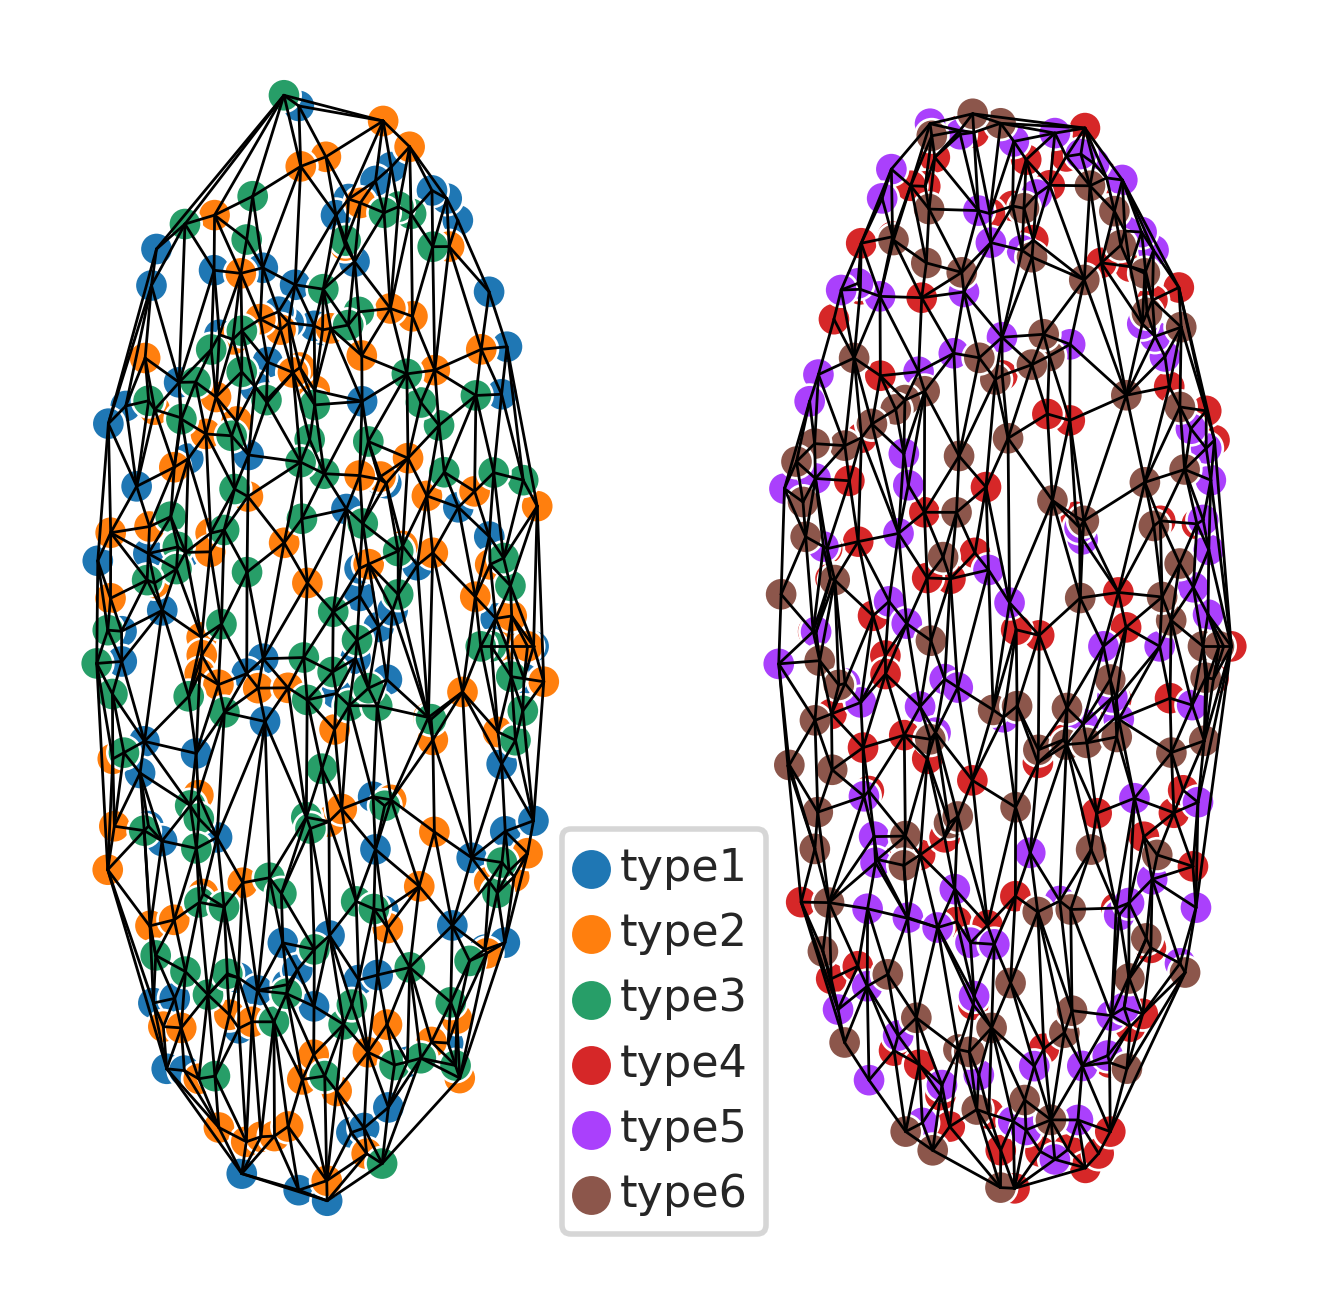

Script loaded!


,x,y,phenotype
135,9.297261,10.923388,type2


In [104]:
thr = 5
importlib.reload(SpAn)
coords = pd.read_csv('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_coords.csv',sep=',',index_col=0)
nodes = pd.read_csv('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_nodes.csv',sep=',',index_col=0)
phenotype = pd.read_csv('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_phenotype.csv',sep=',',index_col=0)
expression = pd.read_csv('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_expression.csv',sep=',',index_col=0)

types = [item for sublist in phenotype.values for item in sublist]
edges_array = SpAn.delaunay_edges(coords)
edges_array = SpAn.trim_edges_by_distance(coords, edges_array, thr )
edges = pd.DataFrame(edges_array)
edges.to_csv('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_edges.csv',sep=',' )
SpAn.plot_network(coords, edges_array, types = types, linewidth = .5)

importlib.reload(SpAn)
AdjMat = SpAn.make_adj_matrix(edges)
AdjMat.to_csv('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_AdjMat.csv')

nodes.sample()

# Mosna

In [105]:
path_src = '../../../src'
sys.path.append(path_src)
import MOSNA_implementation as MOSNA

output_path = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/'
cluster_params = {
    'reducer_type': 'umap', 
    'n_neighbors': 30, 
    'metric': 'euclidean', #'manhattan', # or 'euclidean',
    'min_dist': 0.0,
    'clusterer_type': 'leiden', 
    'dim_clust': 2, 
    'k_cluster': 30, 
    'resolution_parameter': 0.005,
}

cluster_labels, cluster_dir, nb_clust, _ = MOSNA.run_NichesDetection(coords, types, expression, thr = 5, mosna_output_path = '../../../data/intermediate/MOSNA/', output_path = output_path , data_info = None, plot_network = False,  cluster_params = cluster_params)

SpAn.plot_cells_with_hulls(nodes[['x','y']], cluster_labels, quantile_threshold=1, alpha=0.2)


ModuleNotFoundError: No module named 'torch'

# UTAG

In [ ]:
# ! pip install git+https://github.com/ElementoLab/utag.git@main

Applying UTAG Algorithm...


/home/abdelmounim.essabbar/Projects/Spatial-Omics-Networks-Benchmark-/.venv/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100%|██████████| 1/1 [00:00<00:00,  7.54it/s]


Overwriding provided number of PCA dimensions to match number of features: 1


/home/abdelmounim.essabbar/Projects/Spatial-Omics-Networks-Benchmark-/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
100%|██████████| 1/1 [00:00<00:00,  9.12it/s]


Applying Leiden Clustering at Resolution: 0.5...


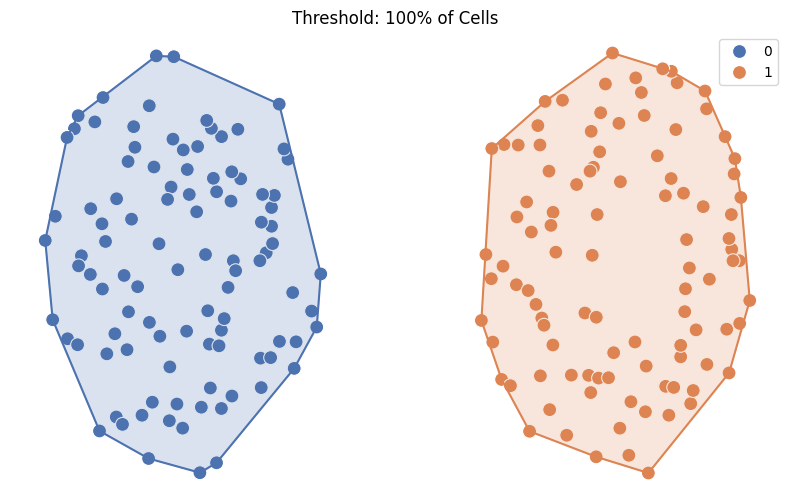

<Axes: title={'center': 'Threshold: 100% of Cells '}>

In [4]:
import UTAG_implementation as UTAG
importlib.reload(UTAG)
resolution = 0.5
res = UTAG.run_UTAG(nodes, resolutions = [resolution])
cluster_labels = res.obs[f'UTAG Label_leiden_{resolution}'].values
SpAn.plot_cells_with_hulls(nodes[['x','y']], cluster_labels, quantile_threshold=1, alpha=0.2)


# Cellcharter

In [1]:
# ! conda activate cellcharter-env 

In [4]:
import sys
path_src = '../../../src'
sys.path.append(path_src)

import CellCharter_implementation as CellCharter
importlib.reload(CellCharter)

CellCharter.run_CellCharter(nodes, n_clusters=2)

ImportError: cannot import name 'AnyRandom' from 'scanpy._utils' (/home/abdelmounim.essabbar/mambaforge/envs/cellcharter_env/lib/python3.10/site-packages/scanpy/_utils/__init__.py)

/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


  0%|          | 0/4 [00:00<?, ?it/s]

/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

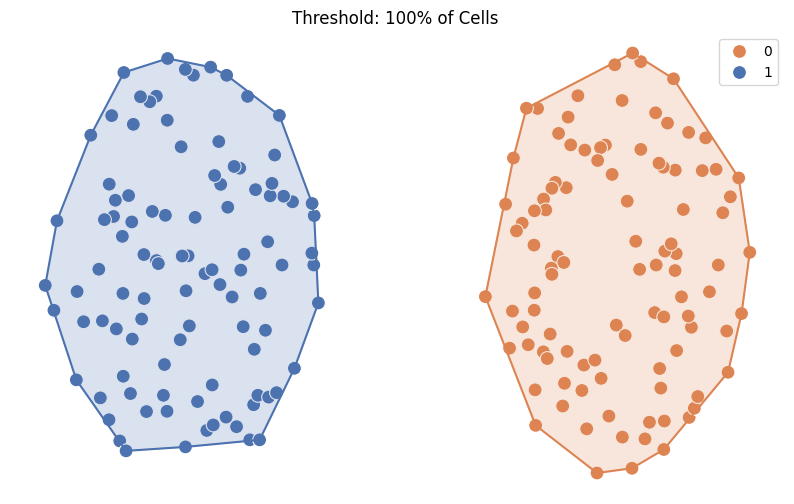

<Axes: title={'center': 'Threshold: 100% of Cells '}>

In [8]:
adata = ad.AnnData(X=dum)
adata.obs['niche'] = nodes['niche'].values
adata.obs['cell_type'] = nodes['phenotype'].values
adata.obs['patient'] = nodes['patient'].values
adata.uns['spatial'] = {'coordinates': nodes[['x', 'y']].values.tolist()}
adata.obsm['spatial'] = nodes[['x', 'y']].values
adata

sq.gr.spatial_neighbors(adata, coord_type='generic', delaunay=True)

cc.gr.remove_long_links(adata)

cc.gr.aggregate_neighbors(adata, n_layers=3)
gmm = cc.tl.Cluster(
    n_clusters=2, 
    trainer_params=dict(accelerator='gpu', devices=1)
)
gmm.fit(adata, use_rep='X_cellcharter')
adata.obs['spatial_cluster'] = gmm.predict(adata, use_rep='X_cellcharter')


var = 'CellCharter'

nodes[var] = adata.obs['spatial_cluster'].values

SpAn.plot_cells_with_hulls(nodes[['x','y']], nodes[var], quantile_threshold=1, alpha=0.2)

# SpiceMix

In [ ]:
import sys
path_src = '../../../src'
sys.path.append(path_src)
import SpiceMix_implementation as SpMx
importlib.reload(SpMx)

# SOTIP

In [106]:
import sys
path_src = '../../../src'
sys.path.append(path_src)
import SOTIP_implementation as STP
import importlib
importlib.reload(STP)

<module 'SOTIP_implementation' from '/home/abdelmounim.essabbar/Projects/Spatial-Omics-Networks-Benchmark-/pipelines/4 - Clusters Detection/4 - 1 - Simulation Data/../../../src/SOTIP_implementation.py'>

In [107]:
import sys
path_src = '../../../src'
sys.path.append(path_src)
import SOTIP_implementation as STP
import importlib
importlib.reload(STP)
coords_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_coords.csv')
nodes_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_nodes.csv')
phenotype_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_phenotype.csv')
expression_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_expression.csv')
adjMat_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_AdjMat.csv')
config_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_AdjMat.csv')


In [ ]:
importlib.reload(STP)

config = {"knn": 10, "n_neighbours": 500, 'out_dir':"../data/intermediate/SOTIP"}
# STP.get_anndata(coords_path, expression_path, phenotype_path, expression_path, adjMat_path, None)

adata = STP.run_sotip(
    coordinates=coords_path,
    matrix=expression_path,
    features=phenotype_path,
    observations=expression_path,
    neighbors=None,
    out_dir="../data/intermediate/SOTIP",
    dim_red=None,
    n_clusters=10,
    technology="Visium",
    seed=42,
    config=config
)
adata.uns['neighboors'] = {'connectivities_key': 'connectivities',
 'distances_key': 'distances',
 'params': {'n_neighbors': 15,
  'method': 'umap',
  'random_state': 0,
  'metric': 'euclidean'}}
import scanpy as sc
cls_key = 'leiden'

sc.tl.paga(adata,groups=cls_key)
sc.pl.paga_compare(adata,basis='X_umap')

# spaGCN

In [4]:
import sys
import importlib
path_src = '../../../src'
sys.path.append(path_src)
import spaGCN_implementation as SPG
importlib.reload(SPG)

coords_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_coords.csv')
nodes_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_nodes.csv')
phenotype_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_phenotype.csv')
expression_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_expression.csv')
adjMat_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_AdjMat.csv')
config_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_AdjMat.csv')

In [ ]:
importlib.reload(SPG)
out_dir = "../../../data/intermediate/spaGCN"
config = {"method": "louvain", "refine": 0, "alpha": 1, "p": 0.5, "n_pcs": 2, "n_neighbors": 10}
spagcn_labels = SPG.run_spagcn(coordinates = coords_path, features = expression_path, observations = phenotype_path, out_dir = out_dir, n_clusters = 2, technology = 'Visium', seed = 42 , config = config)

  

# SEDR

In [1]:
import sys
import importlib
path_src = '../../../src'
sys.path.append(path_src)
import SEDR_implementation as SEDR
importlib.reload(SEDR)

coords_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_coords.csv')
nodes_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_nodes.csv')
phenotype_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_phenotype.csv')
expression_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_expression.csv')
adjMat_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_AdjMat.csv')
config_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_AdjMat.csv')

In [13]:
importlib.reload(SEDR)

config = {
    "device": "cpu", 
    "cluster_method": "mclust", 
    "using_dec": 1
    }

out_dir = "../../../data/intermediate/SEDR"

SEDR.run_sedr(config= config, out_dir_path=out_dir, n_clusters=10, technology="Visium", seed=42,
        observations_path=expression_path, features_path=phenotype_path, coordinates_path=coords_path,
        cluster_method="leiden")

100%|██████████| 200/200 [00:05<00:00, 39.85it/s]


,label
0,2
1,2
2,2
3,2
4,2
...,...
595,8
596,8
597,4
598,4


# GraphST

In [2]:
import sys
import importlib
path_src = '../../../src'
sys.path.append(path_src)
import GraphST_implementation as GraphST
importlib.reload(GraphST)

coords_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_coords.csv')
nodes_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_nodes.csv')
phenotype_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_phenotype.csv')
expression_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_expression.csv')
adjMat_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_AdjMat.csv')
config_path = str('../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_AdjMat.csv')

In [3]:
config = {
    "n_clusters": 5,
    "seed": 42,
    "technology": "Visium",
    "method": "some_method",
    "refine": True,
    "radius": 50
}

out_dir = "../../../data/intermediate/SEDR"

label_df = GraphST.run_graphST(coords_path, expression_path, expression_path, phenotype_path, neighbors = None, config = config, out_dir = out_dir)
label_df

NameError: name 'out_dir' is not defined

# Stagate

# BayesSpace

#### Check file ```rscript/BayesSpace.R``` for details about running BayesSpace 

In [9]:
nodes.shape

(200, 12)

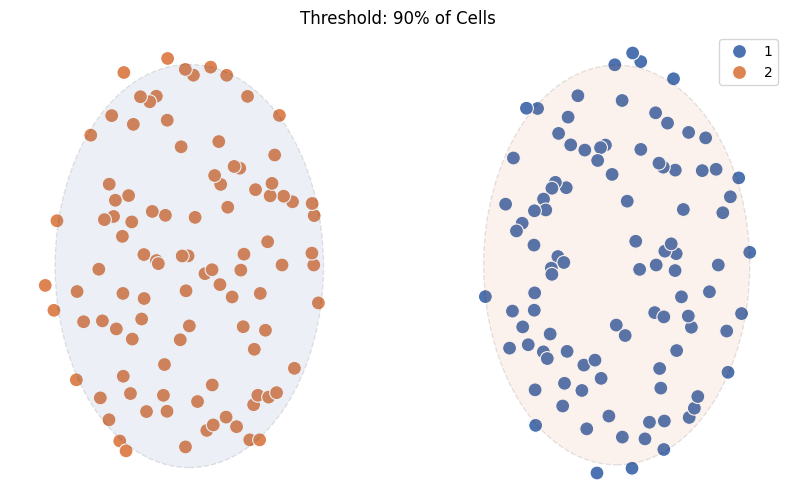

<Axes: title={'center': 'Threshold: 90% of Cells'}>

In [10]:
BayesSpace = pd.read_csv('../data/simulation_coordiantes/BayesSpace/isolated_niches.csv', index_col=0)
var = 'BayesSpace'
nodes[var] = BayesSpace['spatial.cluster'].values
SpAn.plot_cells_with_circles(nodes[['x','y']], nodes[var], quantile_threshold=.9, alpha=0.1)


In [21]:
! pip install squidpy scanpy anndata

  Using cached squidpy-1.6.0-py3-none-any.whl.metadata (8.9 kB)
  Using cached dask_image-2024.5.3-py3-none-any.whl.metadata (2.8 kB)
  Using cached docrep-0.3.2-py3-none-any.whl
  Using cached matplotlib_scalebar-0.8.1-py2.py3-none-any.whl.metadata (13 kB)
  Using cached omnipath-1.0.8-py3-none-any.whl.metadata (6.5 kB)
  Using cached spatialdata-0.2.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached validators-0.33.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached xarray-2024.7.0-py3-none-any.whl.metadata (11 kB)
  Using cached zarr-2.18.2-py3-none-any.whl.metadata (5.7 kB)
  Using cached aiohappyeyeballs-2.3.4-py3-none-any.whl.metadata (5.6 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached pims-0.7.tar.gz (87 kB)
  Preparing metadata (setup.py) ... done
  Using cached inflect-7.3.1-py3-none-any.whl.metadata (21 kB)
  Using cached fsspec-2023.6.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached multiscale_spatial_image-1.0.1-py3-none-any.whl.met

In [22]:
import squidpy as sq
import scanpy as sc
import anndata as ad
import numpy as np

# Assuming `data` is your dataset containing 'coordinates' and 'cell_type'
# Create an AnnData object

adata = ad.AnnData(X=dum)  # Random data, replace with your actual gene expression matrix

adata.obs['cell_type'] = pd.Categorical(nodes['phenotype'])  # Random cell types, replace with actual
adata.obsm['spatial'] = nodes[['x','y']].values  # Random coordinates, replace with actual
adata

AnnData object with n_obs × n_vars = 200 × 2
    obs: 'cell_type'
    obsm: 'spatial'

# SquidPy + scanpy

/home/abdelmounim.essabbar/Projects/Spatial-Omics-Networks-Benchmark-/.venv/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100%|██████████| 1000/1000 [00:00<00:00, 3924.48/s]
/home/abdelmounim.essabbar/Projects/Spatial-Omics-Networks-Benchmark-/.venv/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


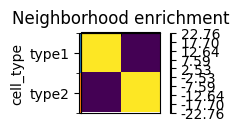

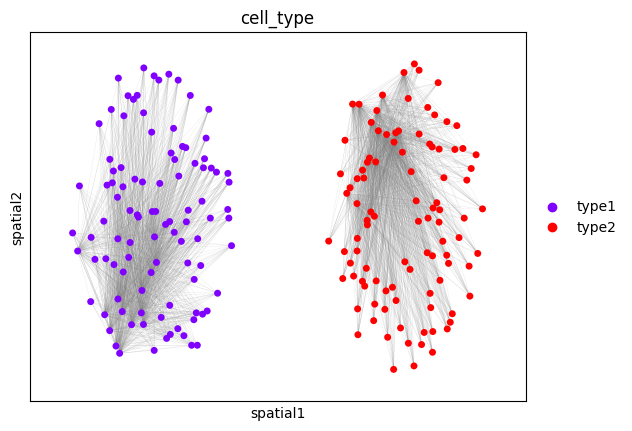

/home/abdelmounim.essabbar/Projects/Spatial-Omics-Networks-Benchmark-/.venv/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


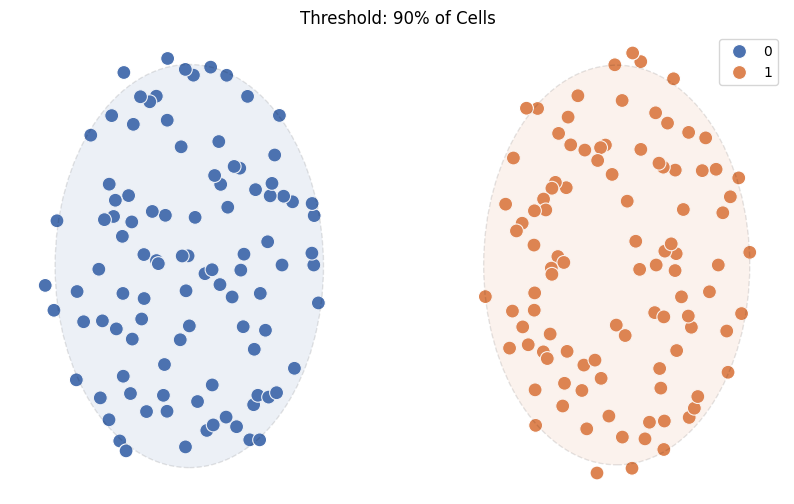

<Axes: title={'center': 'Threshold: 90% of Cells'}>

In [23]:
import squidpy as sq
import scanpy as sc
import anndata as ad
import numpy as np

# Assuming `data` is your dataset containing 'coordinates' and 'cell_type'
# Create an AnnData object

adata = ad.AnnData(X=dum)  # Random data, replace with your actual gene expression matrix

adata.obs['cell_type'] = pd.Categorical(nodes['phenotype'])  # Random cell types, replace with actual
adata.obsm['spatial'] = nodes[['x','y']].values  # Random coordinates, replace with actual

# Calculate neighborhood enrichment
sq.gr.spatial_neighbors(adata, coord_type="generic")  # Adjust parameters as needed
sq.gr.nhood_enrichment(adata, cluster_key='cell_type')

# Plot neighborhood enrichment
sq.pl.nhood_enrichment(adata, cluster_key='cell_type')

sq.gr.spatial_neighbors(adata, coord_type='generic', delaunay=True)
sc.pp.neighbors(adata)

# Additional visualization to explore the spatial distribution
sc.pl.embedding(adata, basis='spatial', color='cell_type', edges=True, edges_width=0.05, s=100, palette='rainbow')


sc.pp.neighbors(adata, 5)
# Perform clustering
sc.tl.leiden(adata,  resolution=1.2)

# Add clustering results to the data
adata.obs['clusters'] = adata.obs['leiden']

spatial_connectivities = adata.obsp["spatial_connectivities"]
edges_matrix = pd.DataFrame(spatial_connectivities.toarray(), 
                                         index=adata.obs_names, 
                                         columns=adata.obs_names)


var = 'SquidPy'
nodes[var] =  adata.obs['leiden'].values
SpAn.plot_cells_with_circles(nodes[['x','y']], nodes[var], quantile_threshold=.9, alpha=0.1)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# StLearn

In [12]:
coordinates = nodes[['x','y']]

/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


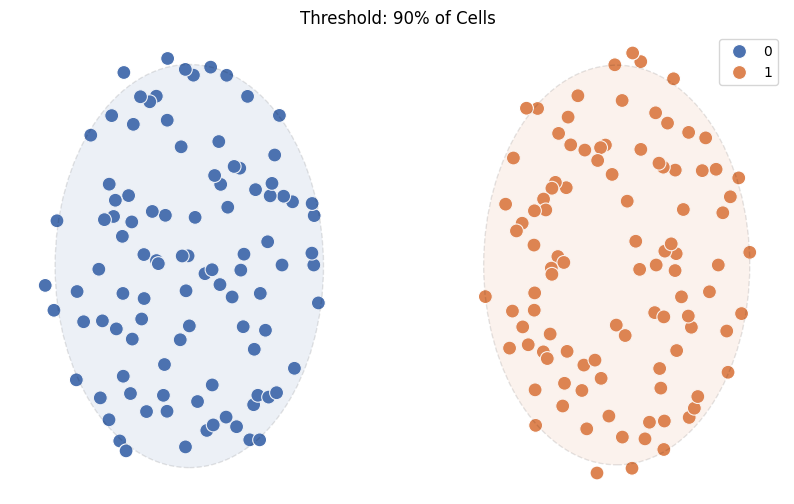

<Axes: title={'center': 'Threshold: 90% of Cells'}>

In [13]:
import stlearn as st
import scanpy as sc

# Create an AnnData object
adata = sc.AnnData(X = dum )
adata.obsm['spatial'] = coordinates.values

# Add cell types as metadata
adata.obs['cell_type'] = pd.Categorical(nodes['phenotype'].values)

# Normalize and scale the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
# sc.pp.highly_variable_genes(adata, n_top_genes=2000)
# adata = adata[:, adata.var.highly_variable]

# Perform PCA
sc.tl.pca(adata, svd_solver='arpack')

# Neighbors and clustering
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

# Visualize the clusters
# sc.pl.umap(adata, color=['leiden', 'cell_type'])


var = 'StLearn'
nodes[var] =  adata.obs['leiden'].values
SpAn.plot_cells_with_circles(nodes[['x','y']], nodes[var], quantile_threshold=.9, alpha=0.1)

# imcRtools

#### Check file ```rscript/imcRtools.R``` for more details 

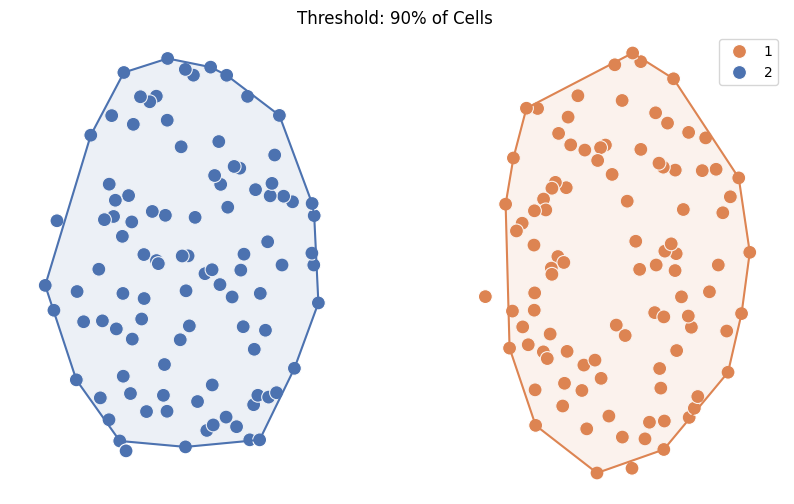

<Axes: title={'center': 'Threshold: 90% of Cells '}>

In [14]:
aN = pd.read_csv('../data/simulation_coordiantes/imcRtools/isolated_niches.csv')
imcRtoolsAN = pd.concat([nodes,aN], axis=1)
imcRtoolsAN.sample()


var = 'imcRtools'
nodes[var] = imcRtoolsAN['clustered_neighbors'].values
SpAn.plot_cells_with_hulls(nodes[['x','y']], nodes[var], quantile_threshold=.9, alpha=0.1)

# Compare

# Adding an annotation of each cell type an it neighboor

In [15]:
nodes
Edges = pd.DataFrame(edges)
Neighborhood = []

def get_type(nodes, node_idx, type = 'niche'):
    df = nodes.iloc[node_idx,:]
    return df[type]

for node in nodes.index:
    source = node
    node_source = nodes.iloc[source,:]
    targets = Edges.loc[Edges[0] == node , 1].to_list()
    sources = Edges.loc[Edges[1] == node , 0].to_list()
    if len(sources)>0:
        targets+= sources
    type_source = get_type( nodes, source, 'niche')
    associated_types = set()
    for target in targets:
        associated_types.add(get_type( nodes, target, 'niche'))
    associated_types = '_'.join(sorted(associated_types))
    Neighborhood.append(associated_types)

nodes['Neighborhood'] = Neighborhood

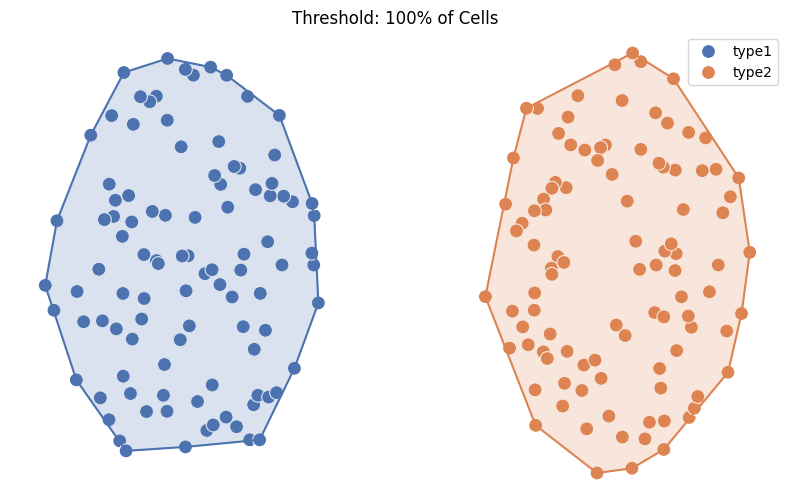

<Axes: title={'center': 'Threshold: 100% of Cells '}>

In [16]:
SpAn.plot_cells_with_hulls(nodes[['x','y']], nodes['phenotype'], quantile_threshold=1, alpha=0.2)


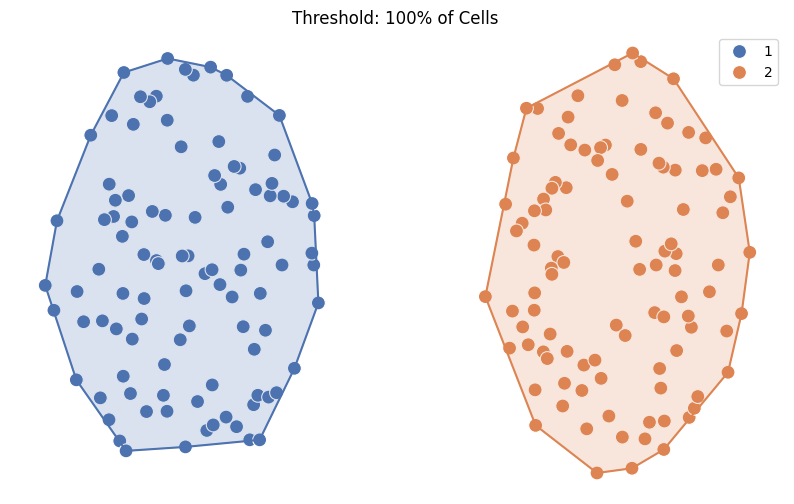

<Axes: title={'center': 'Threshold: 100% of Cells '}>

In [17]:

SpAn.plot_cells_with_hulls(nodes[['x','y']], nodes['Neighborhood'], quantile_threshold=1, alpha=0.2)


In [18]:
Nodes = nodes.copy()
Nodes = Nodes.drop(['x', 'y', 'niche', 'phenotype', 'type1', 'type2', 'patient'],axis=1)
Nodes.sample()

,1,2,MOSNA,UTAG,CellCharter,BayesSpace,SquidPy,StLearn,imcRtools,Neighborhood
60,1,0,1,0,1,2,0,0,2,1


Comparing 2 and Neighborhood


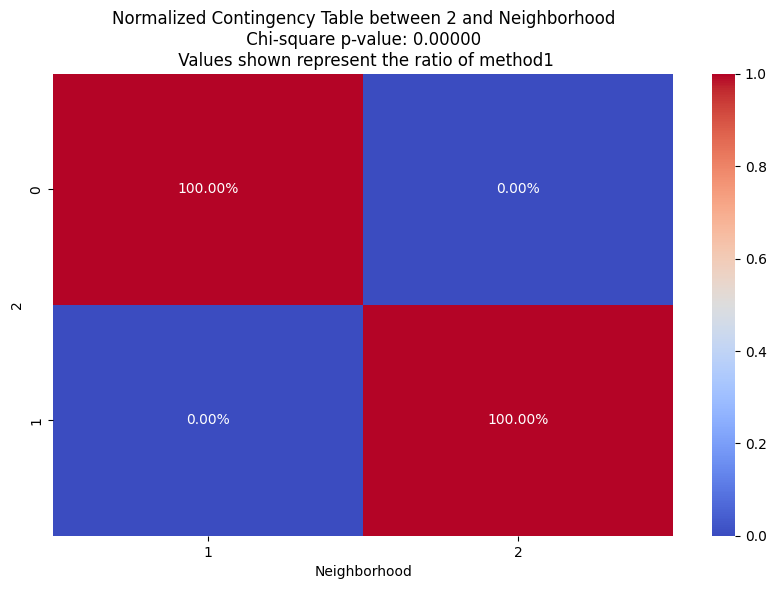

Comparing MOSNA and Neighborhood


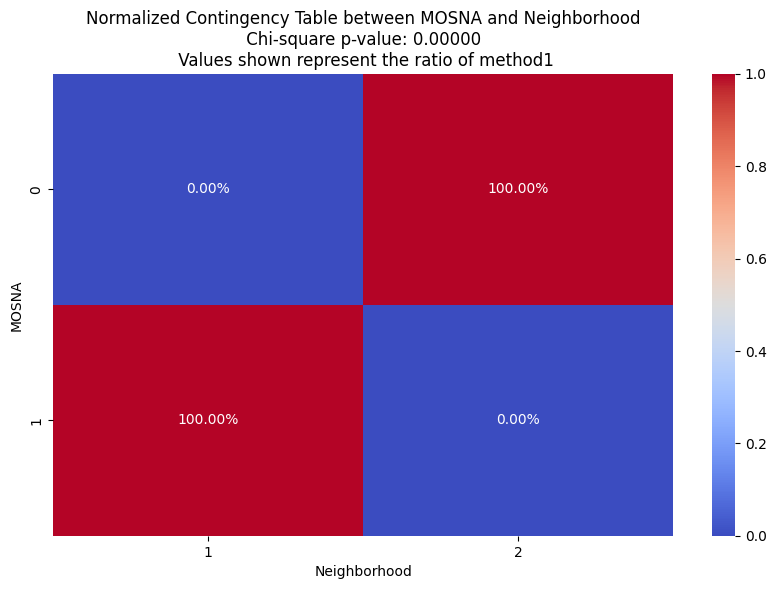

Comparing UTAG and Neighborhood


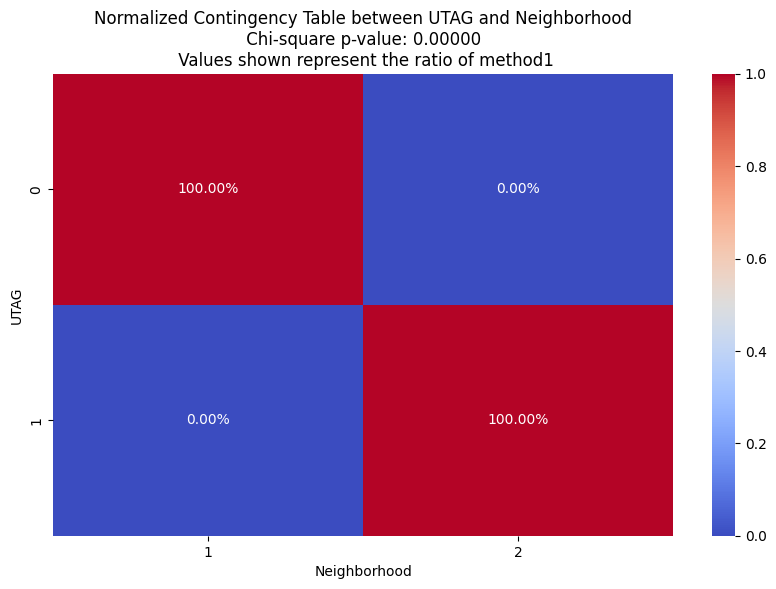

Comparing CellCharter and Neighborhood


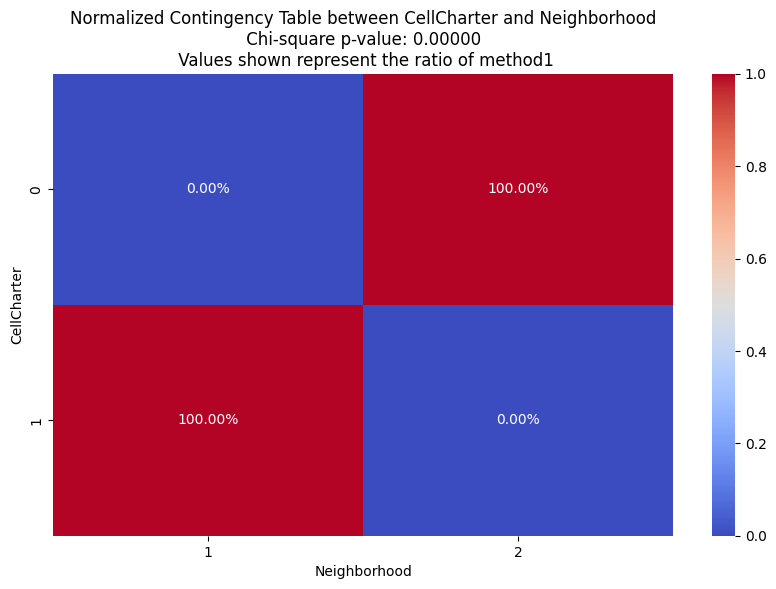

Comparing BayesSpace and Neighborhood


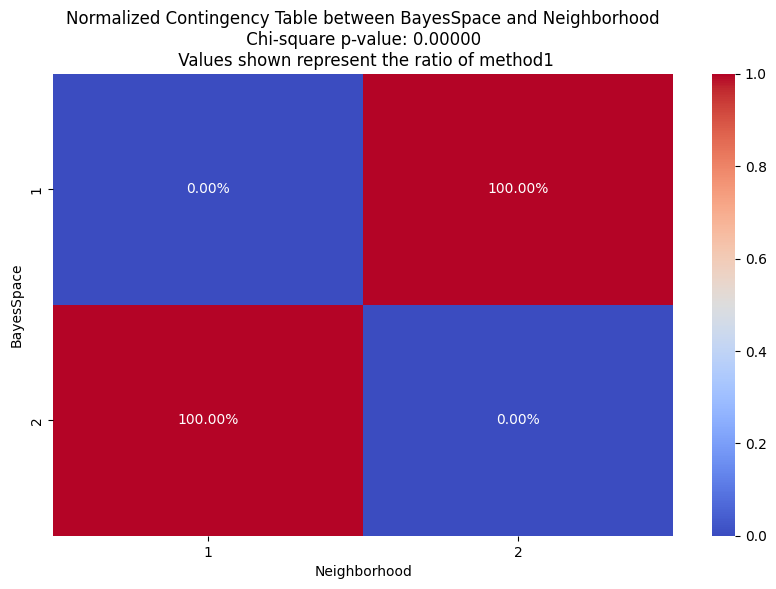

Comparing SquidPy and Neighborhood


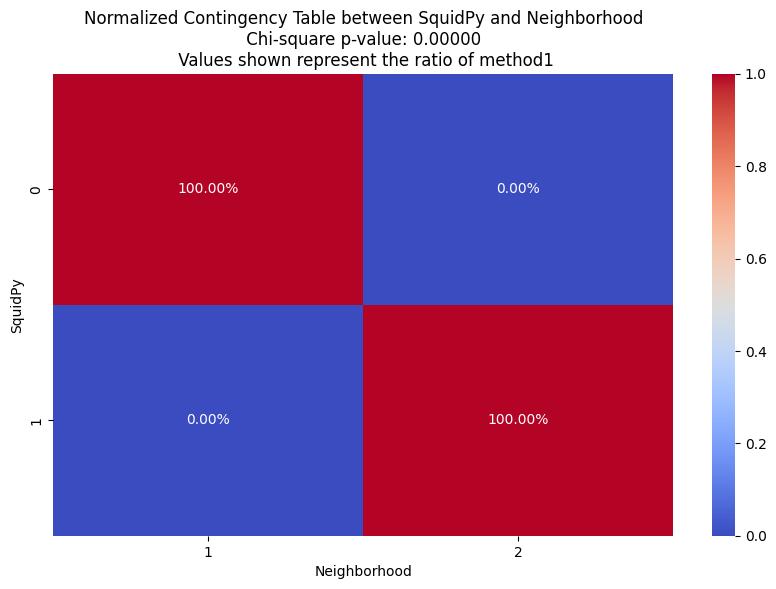

Comparing StLearn and Neighborhood


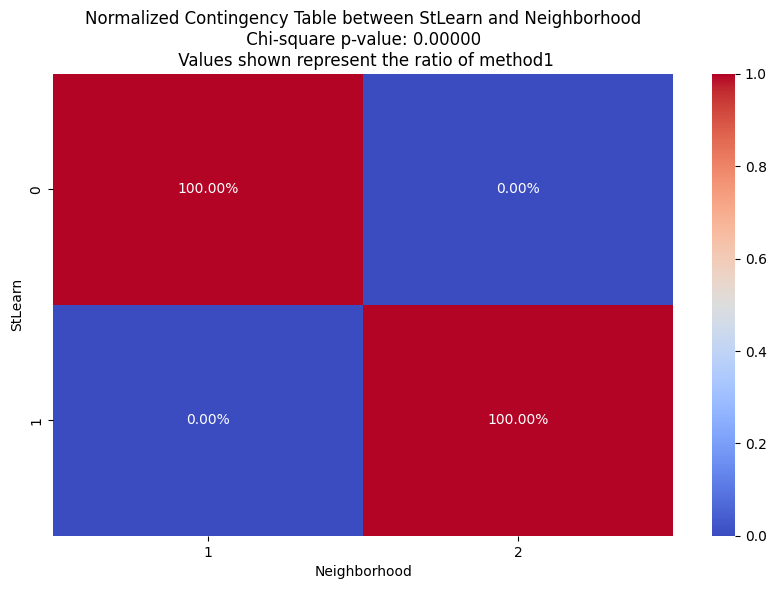

Comparing imcRtools and Neighborhood


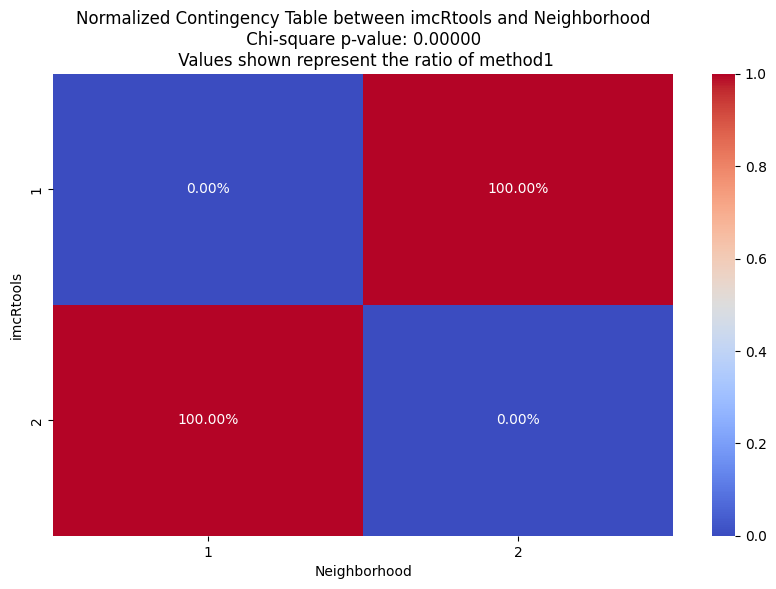

Comparing Neighborhood and Neighborhood


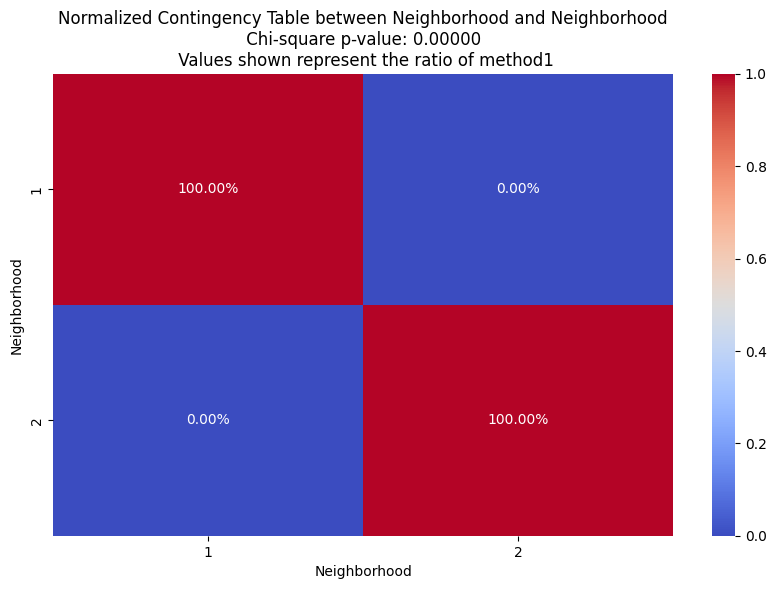

{'2': 1.0,
 'MOSNA': 1.0,
 'UTAG': 1.0,
 'CellCharter': 1.0,
 'BayesSpace': 1.0,
 'SquidPy': 1.0,
 'StLearn': 1.0,
 'imcRtools': 1.0,
 'Neighborhood': 1.0}

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create a DataFrame
df = pd.DataFrame(Nodes).iloc[:,1:]


# Function to create and plot a normalized contingency table
def plot_normalized_contingency_table(df, method1, method2):
    contingency_table = pd.crosstab(df[method1], df[method2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    # Normalize the contingency table
    normalized_contingency_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(normalized_contingency_table, annot=True, cmap='coolwarm', fmt='.2%')
    plt.title(f'Normalized Contingency Table between {method1} and {method2}\n Chi-square p-value: {p:.5f} \n Values shown represent the ratio of method1')
    plt.show()
    
    return normalized_contingency_table

# Compare each pair of methods
methods = df.columns
mean_acc = {}
for i in range(len(methods)):
    method1 = methods[i]
    method2 = 'Neighborhood'
    print(f'Comparing {method1} and {method2}')
    contingency_table = plot_normalized_contingency_table(df, method1, method2)
    mean_acc[method1] = contingency_table.max(axis=0).mean()

mean_acc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


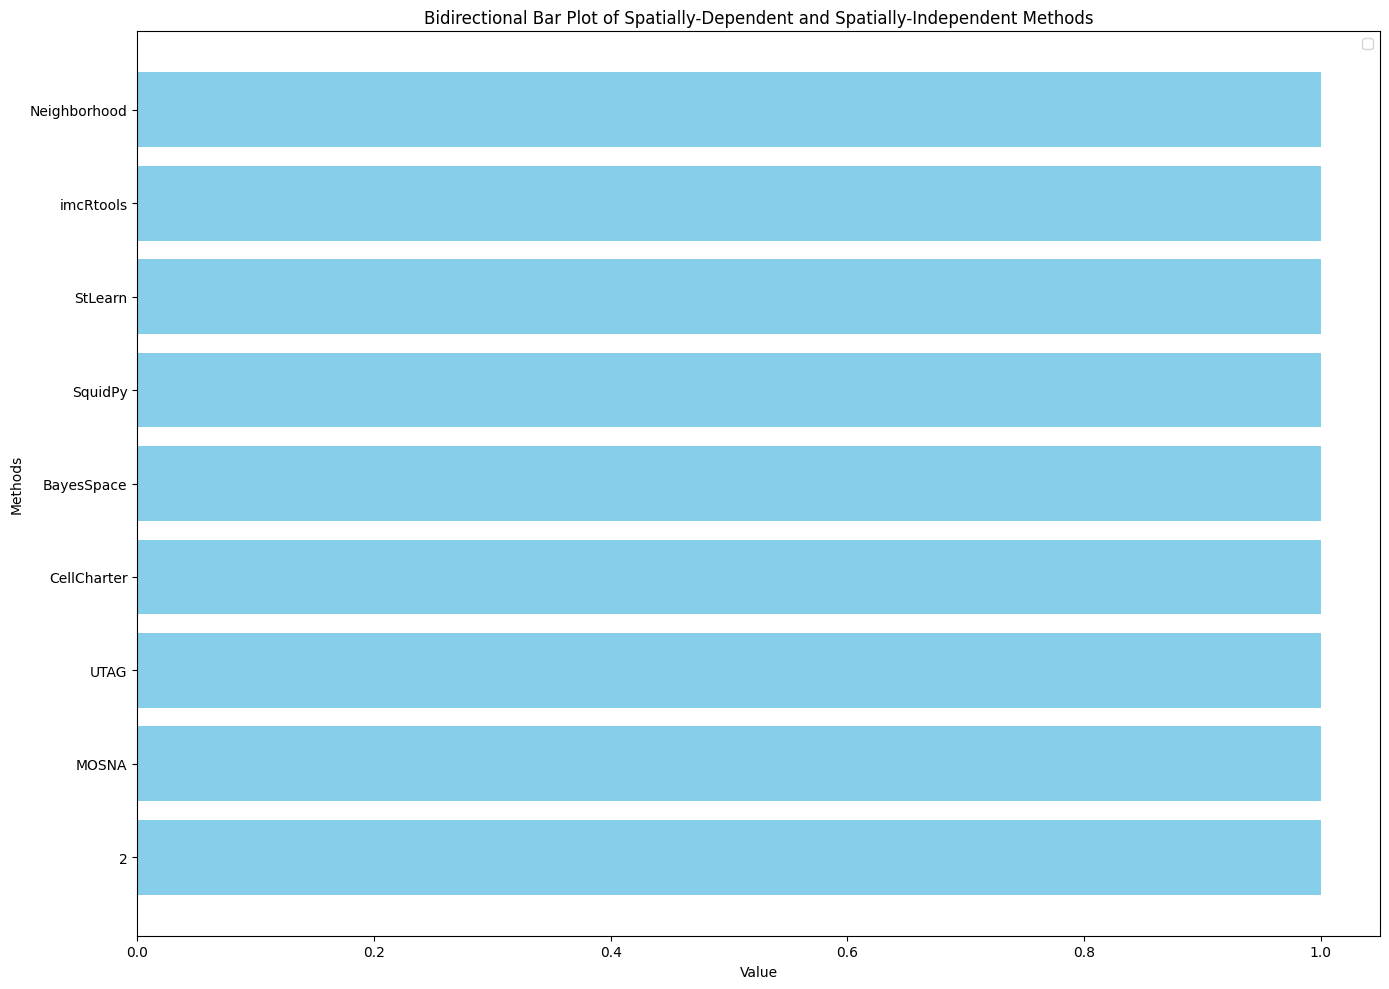

In [20]:

# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(mean_acc.items()), columns=['Method', 'Value'])

# Separate the data into two categories: Dependent and Independent
df_iso = df

# Create the bidirectional bar plot
fig, ax = plt.subplots(figsize=(14, 10))

ax.barh(df_iso['Method'], df_iso['Value'], color='skyblue')

ax.set_xlabel('Value')
ax.set_ylabel('Methods')
ax.set_title('Bidirectional Bar Plot of Spatially-Dependent and Spatially-Independent Methods')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [24]:
type = 'isolated'

In [25]:
df_iso['model'] = type
df_iso.to_csv(f'../data/niche_simulations/nodes{type}.csv')

# Testing Mehtods

In [1]:
# change kernel / env
# ! conda activate scanit_env

In [8]:
import sys
path_src = '../src'
sys.path.append(path_src)
import importlib
import SpatialMethods as SM

In [31]:
importlib.reload(SM)

output_dir = "simulation_data"
SM.generate_simulation_data(output_dir)


In [36]:
importlib.reload(SM)

SM.run_scan_it(
    coordinates=os.path.join(output_dir, 'coordinates.tsv'),
    features=os.path.join(output_dir, 'features.tsv'),
    observations=os.path.join(output_dir, 'observations.tsv'),
    out_dir=output_dir,
    n_clusters=10,
    technology="Visium",
    seed=42,
    matrix=os.path.join(output_dir, 'matrix.npz'),
    neighbors=os.path.join(output_dir, 'neighbors.npz'),
    dim_red=os.path.join(output_dir, 'dim_red.tsv'),
    image=os.path.join(output_dir, 'image.png'),
    config=os.path.join(output_dir, 'config.json')
)


Epoch: 000, Loss: 1.3928
Epoch: 500, Loss: 0.0587
Epoch: 1000, Loss: 0.0280
Epoch: 1500, Loss: 0.0286
Epoch: 1999, Loss: 0.0189
